## Build the linear regression model using scikit learn in boston data to predict 'Price' based on other dependent variable.

### Importing libraries

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plot
import sklearn
import seaborn as sns
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import sklearn.metrics as metrics

In [2]:
from sklearn.datasets import load_boston
boston = load_boston()

In [3]:
df = pd.DataFrame(boston.data,columns=boston.feature_names)

In [4]:
df.shape

(506, 13)

In [5]:
df['MEDV'] = boston.target

### Data Cleaning

In [6]:
df.head(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


We can the '0' value persists in the ZN & CHAS column. TO resolve this need to replace the mean value of respective field

In [7]:
df['ZN'].replace(0,df['ZN'].mean(),inplace=True)
df['CHAS'].replace(0,df['CHAS'].mean(),inplace=True)

In [8]:
df.head(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.000000,2.31,0.06917,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,11.363636,7.07,0.06917,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,11.363636,7.07,0.06917,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,11.363636,2.18,0.06917,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,11.363636,2.18,0.06917,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


To see the any null present in the dataset. If so, need to update same as above step.

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


Check any null value present in each column, As the result there is no such thing exists. 

In [10]:
df.isnull().sum()/len(df)*100

CRIM       0.0
ZN         0.0
INDUS      0.0
CHAS       0.0
NOX        0.0
RM         0.0
AGE        0.0
DIS        0.0
RAD        0.0
TAX        0.0
PTRATIO    0.0
B          0.0
LSTAT      0.0
MEDV       0.0
dtype: float64

In [11]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,19.717930,11.136779,0.133555,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,19.464872,6.860353,0.236425,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,11.363636,0.460000,0.069170,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,11.363636,5.190000,0.069170,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,11.363636,9.690000,0.069170,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.069170,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


### Data Preprocessing

Before start preprocessing, need to study the nature of data. How is it spread across the dataset.
For that some of the visualization taking part here.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000025B2E783B50>,
      dtype=object)

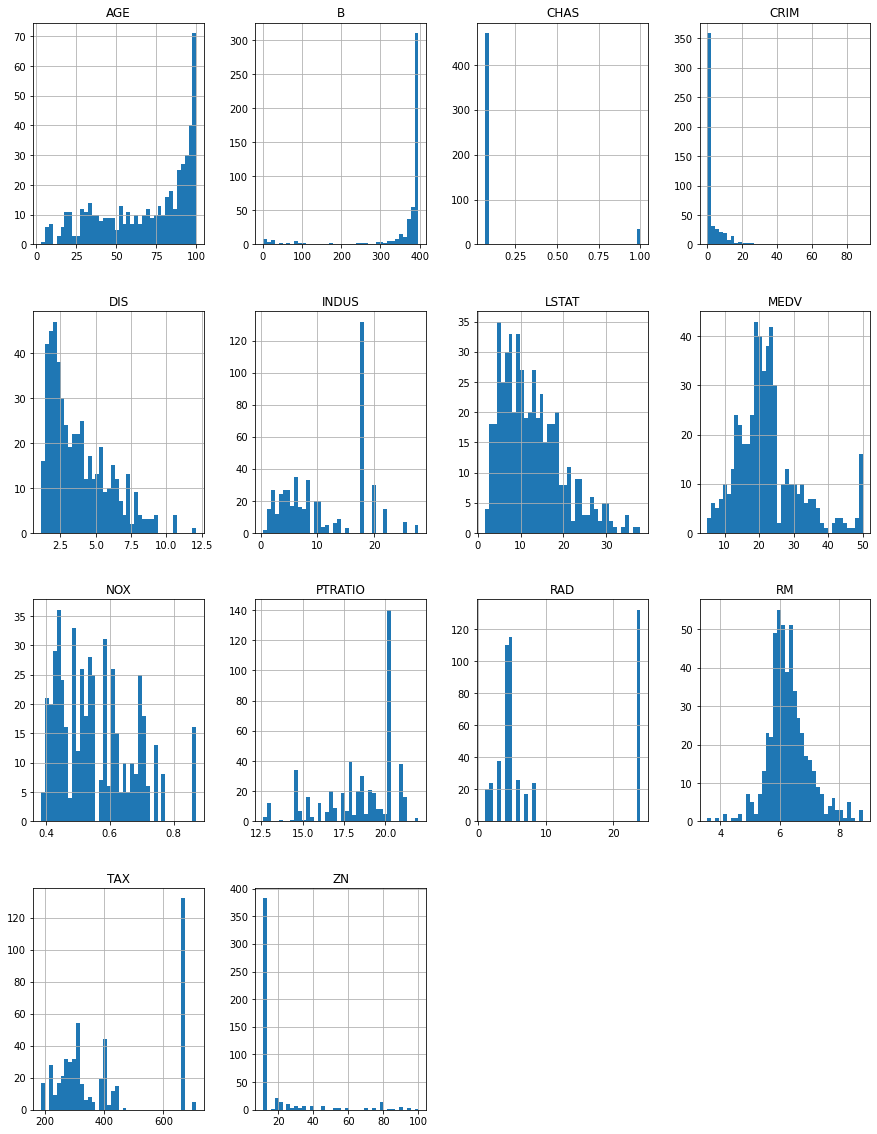

In [12]:
df.hist(figsize=(15,20),bins=40)

D:\ProgramFiles\Anaconda\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
D:\ProgramFiles\Anaconda\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


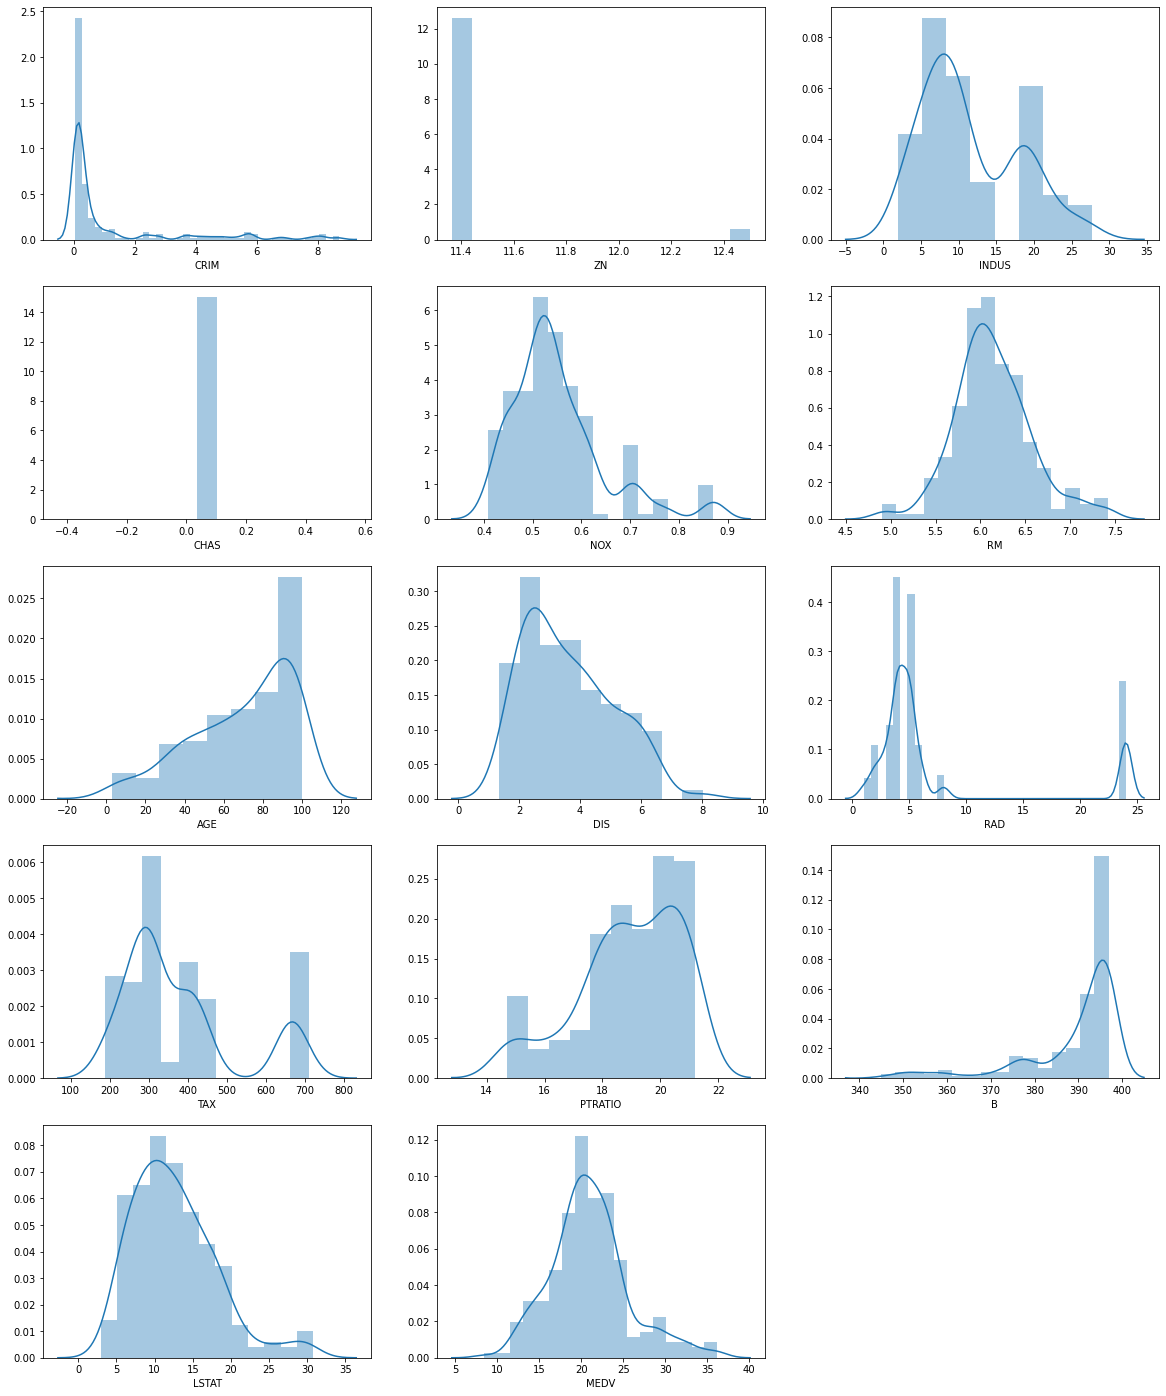

In [47]:
def distribution_plot(df):
    plot.figure(figsize=(20,30))
    index=1
    for col in df.columns:
        ax= plot.subplot(6,3, index)
        sns.distplot(df[col],ax=ax)
        plot.xlabel=col
        index+=1
    #plot.show()

distribution_plot(df)
        
    

D:\ProgramFiles\Anaconda\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


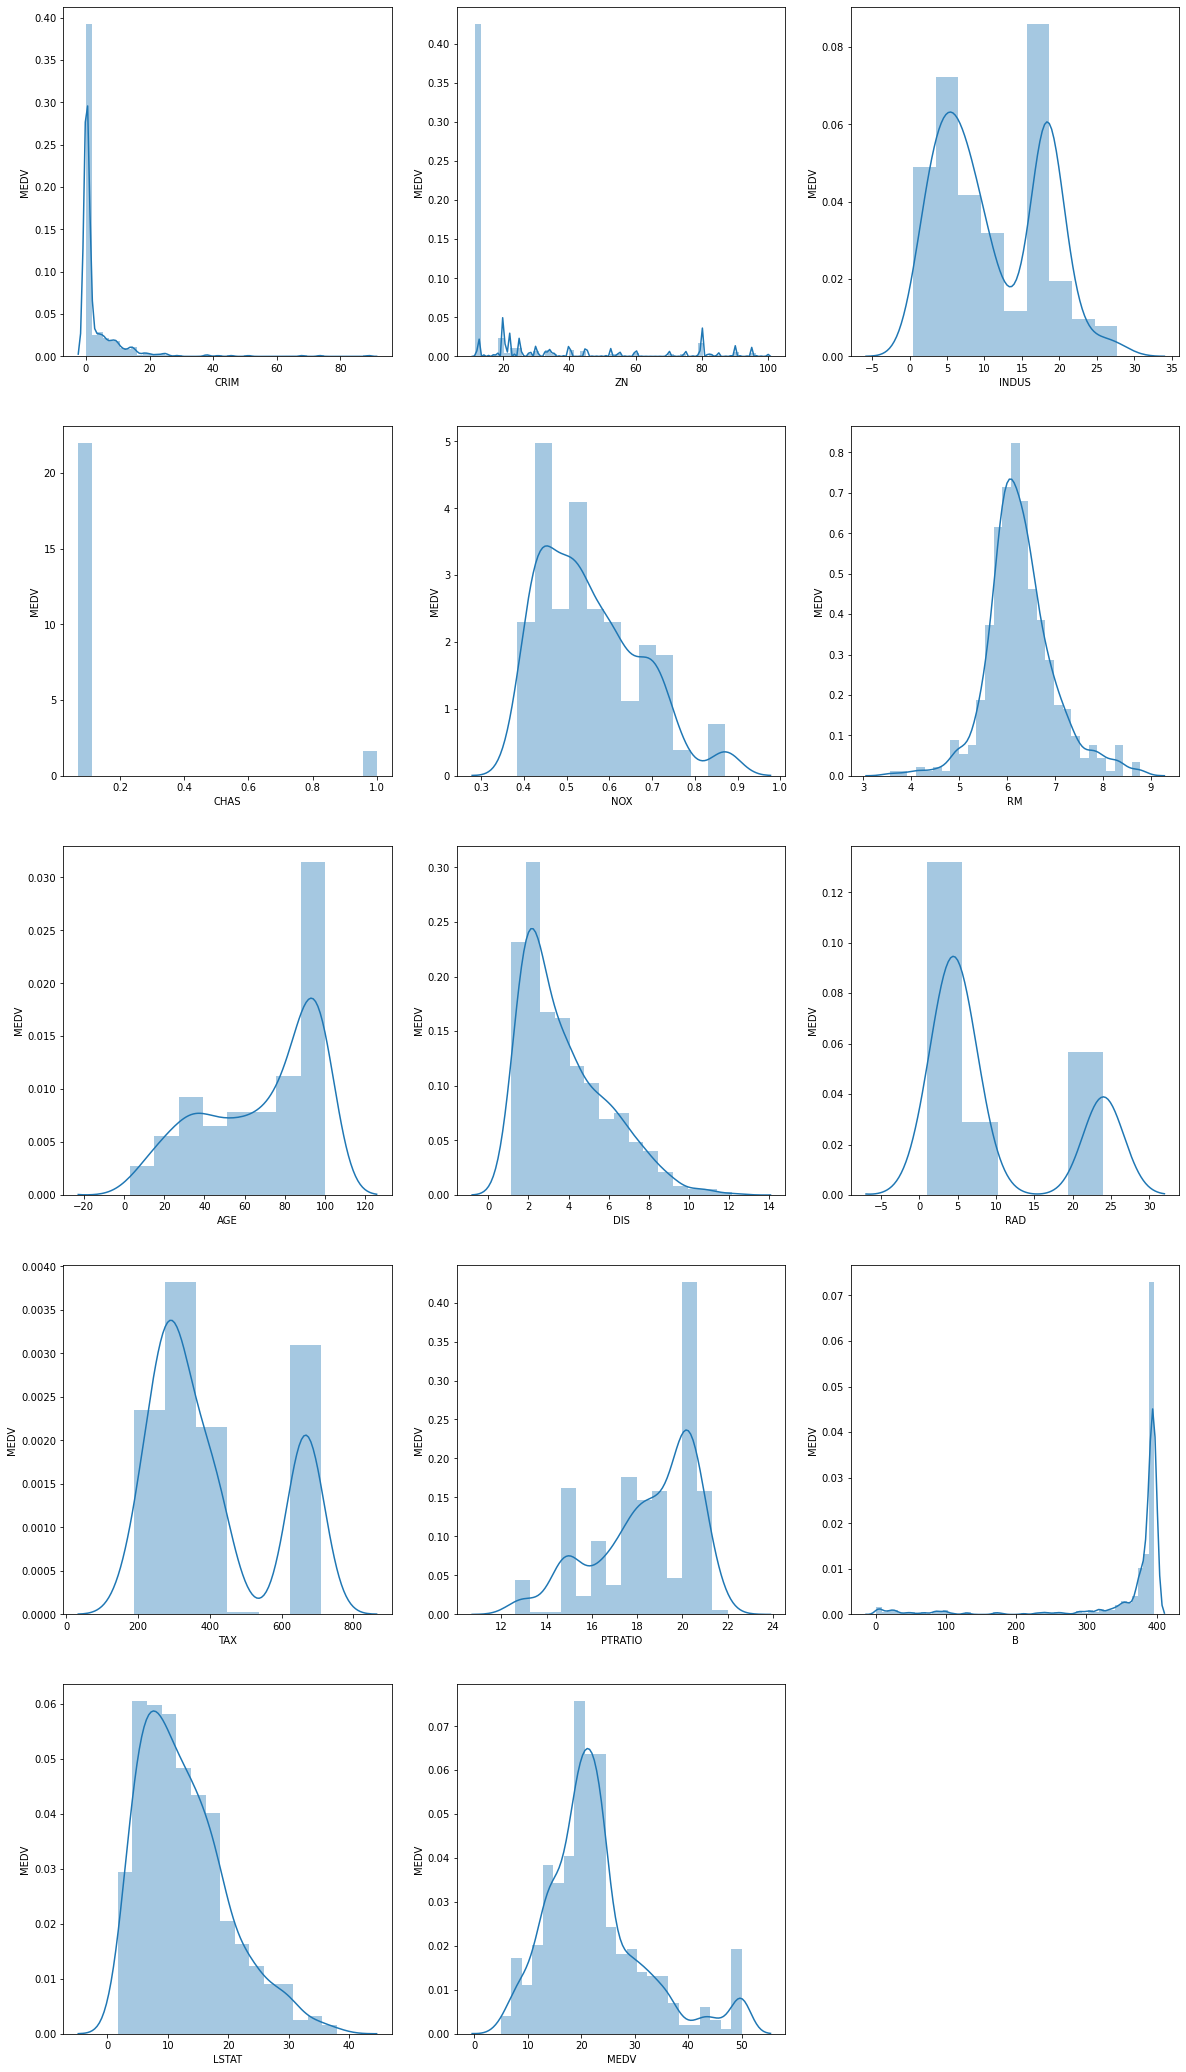

In [14]:
plot.figure(figsize=(20,45))
i=0
for col in df.columns:
    ax = plot.subplot(6,3, i+1)
    x_axis = df[col]
    sns.distplot(x_axis, ax=ax)
    plot.xlabel(col)
    plot.ylabel('MEDV')
    i+=1
plot.show()    

In [15]:
def showBoxPlot(df):
    fig, ax = plot.subplots(figsize=(15,10))
    sns.boxplot(data=df, width= 0.5,ax=ax,  fliersize=3)

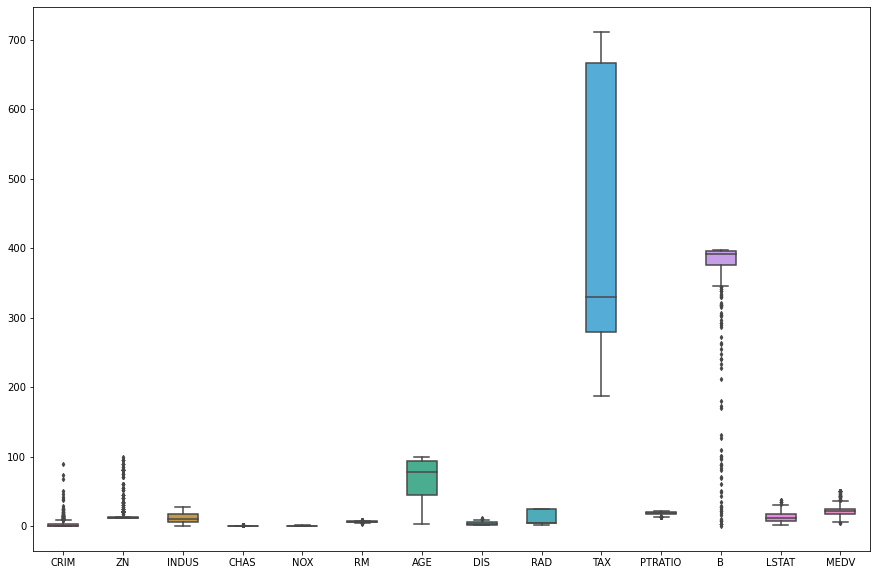

In [16]:
showBoxPlot(df)

As you see some of the data holds ouliers.

### Outlier Removal

Using of interquartile range (IQR) score to determine & removal the outliers

In [17]:
Q1=df.quantile(0.25)
Q3=df.quantile(0.75)
IQR=Q3-Q1
print(IQR)


CRIM         3.595038
ZN           1.136364
INDUS       12.910000
CHAS         0.000000
NOX          0.175000
RM           0.738000
AGE         49.050000
DIS          3.088250
RAD         20.000000
TAX        387.000000
PTRATIO      2.800000
B           20.847500
LSTAT       10.005000
MEDV         7.975000
dtype: float64


In [48]:
df.shape

(229, 14)

Using the below code snippet used to remove the outliers from the dataset

In [18]:
df=df[~((df<(Q1-1.5*IQR)) | (df>(Q3+1.5*IQR))).any(axis=1)]

In [19]:
df.shape

(229, 14)

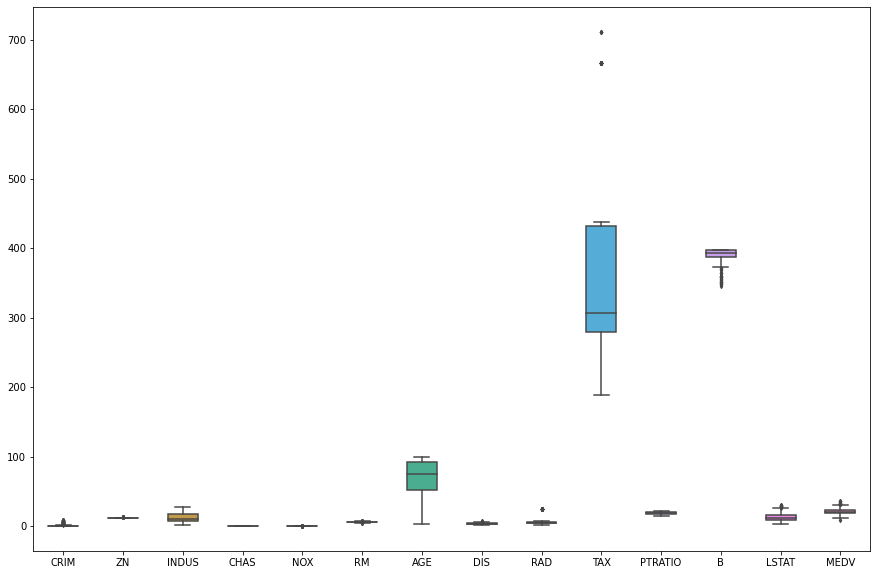

In [20]:
showBoxPlot(df)

Someof the outliers been removed. We can move to next process.

### Data splitting

In [21]:
X = df.drop(['MEDV'], axis=1)
y=df['MEDV'].values

Apply the scaling to standardize the data 

In [22]:
scalar = StandardScaler()
df_scaled = scalar.fit_transform(X)

In [23]:
df_scaled

array([[-0.55300265, -0.21368692, -0.6861799 , ..., -0.6300233 ,
         0.69384404, -0.6267806 ],
       [-0.55301227, -0.21368692, -0.6861799 , ..., -0.6300233 ,
         0.34118391, -1.56171035],
       [-0.55056792, -0.21368692, -1.44869205, ..., -0.12260711,
         0.49715153, -1.76113763],
       ...,
       [-0.53690743, -0.21368692,  0.07165426, ...,  1.17412314,
         0.69384404, -1.26714344],
       [-0.51341178, -0.21368692,  0.07165426, ...,  1.17412314,
         0.39490609, -1.11345636],
       [-0.54333108, -0.21368692,  0.07165426, ...,  1.17412314,
         0.69384404, -0.85731122]])

### Check MultiCollinearity

In [24]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def getVIFTable():
    vif = pd.DataFrame()
    vif['Variables']=X.columns
    vif['VIF']=[variance_inflation_factor(df_scaled, i) for i in range(df_scaled.shape[1])]
    return vif
    

In [25]:
getVIFTable()

,Variables,VIF
0,CRIM,7.056149
1,ZN,1.503705
2,INDUS,2.400703
3,CHAS,1.000000
4,NOX,3.529606
5,RM,1.946217
6,AGE,2.491720
7,DIS,3.017212
8,RAD,9.744992
9,TAX,5.396394


In [26]:
X.drop(['RAD','CRIM','TAX','CHAS'], axis=1, inplace=True)

### Applying the data to train & test

In [27]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state=32)

In [58]:
y.size

229

In [28]:
lr = LinearRegression()
lr.fit(x_train, y_train)
y_pred = lr.predict(x_test)

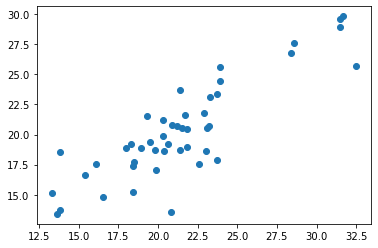

In [59]:
plot.scatter(y_test, y_pred)
plot.show()

### Evaluation Metrics

In [32]:
print("MEAN_SQUARED_ERROR",metrics.mean_squared_error(y_test, y_pred))
print("MEAN_ABSOLUTE_ERROR",metrics.mean_absolute_error(y_test,y_pred))

MEAN_SQUARED_ERROR 6.5199423778176175
MEAN_ABSOLUTE_ERROR 1.8836005918511503


In [35]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.984
Model:                            OLS   Adj. R-squared (uncentered):              0.983
Method:                 Least Squares   F-statistic:                              1482.
Date:                Fri, 26 Feb 2021   Prob (F-statistic):                   1.66e-191
Time:                        12:24:56   Log-Likelihood:                         -555.87
No. Observations:                 229   AIC:                                      1130.
Df Residuals:                     220   BIC:                                      1161.
Df Model:                           9                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
ZN             1.1663      0.601      1.940      0.054      -0.019       2.351
INDUS         -0.0797      0.042     -1.907      0.058      -0.162       0.003
NOX           -6.6945      3.112     -2.151      0.033     -12.828      -0.561
RM             5.1985      0.562      9.249      0.000       4.091       6.306
AGE           -0.0568      0.011     -5.240      0.000      -0.078      -0.035
DIS           -1.0369      0.213     -4.858      0.000      -1.458      -0.616
PTRATIO       -0.7064      0.110     -6.430      0.000      -0.923      -0.490
B              0.0094      0.016      0.605      0.546      -0.021       0.040
LSTAT         -0.1772      0.056     -3.150      0.002      -0.288      -0.066
==============================================================================
Omnibus:                       19.628   Durbin-Watson:                   1.044
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               41.748
Skew:                           0.401   Prob(JB):                     8.60e-10
Kurtosis:                       4.932   Cond. No.                     6.69e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.69e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""